In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [2]:
raw_path = '../data/raw/bot_detection_data.csv'

In [5]:
data = pd.read_csv(raw_path)

In [6]:
data.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [8]:
data.shape

(50000, 11)

In [9]:
data.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [11]:
data.isna().sum()

User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64

In [12]:
data["Bot Label"].value_counts()

1    25018
0    24982
Name: Bot Label, dtype: int64

In [14]:
data["Username"].nunique()

40566

In [15]:
data["User ID"].nunique() 

50000

In [16]:
data["Verified"].value_counts()

True     25004
False    24996
Name: Verified, dtype: int64

In [20]:
data["Location"].nunique()

25199

In [21]:
data["Created At"] = pd.to_datetime(data["Created At"])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User ID         50000 non-null  int64         
 1   Username        50000 non-null  object        
 2   Tweet           50000 non-null  object        
 3   Retweet Count   50000 non-null  int64         
 4   Mention Count   50000 non-null  int64         
 5   Follower Count  50000 non-null  int64         
 6   Verified        50000 non-null  bool          
 7   Bot Label       50000 non-null  int64         
 8   Location        50000 non-null  object        
 9   Created At      50000 non-null  datetime64[ns]
 10  Hashtags        41659 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 3.9+ MB


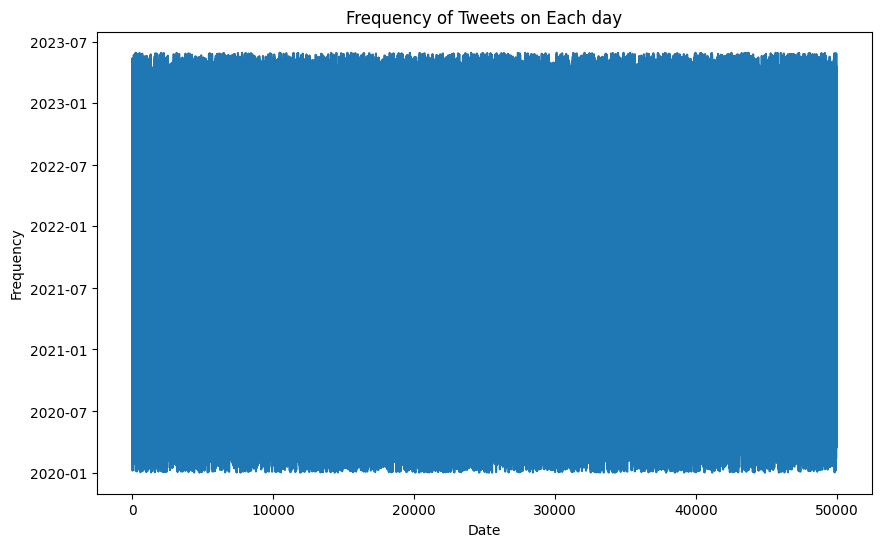

In [29]:
data['Created At'].plot(figsize=(10, 6), kind='line')
plt.title('Frequency of Tweets on Each day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

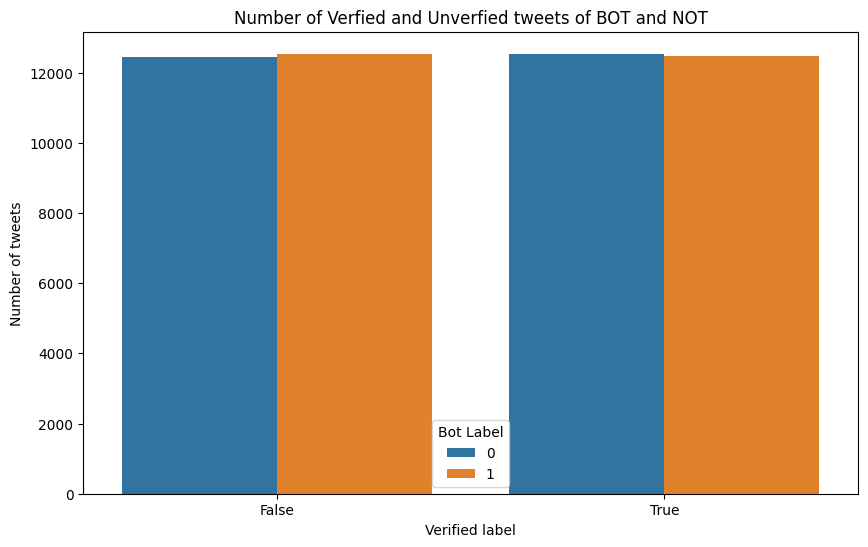

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Verified', hue = 'Bot Label', data = data)
plt.title("Number of Verfied and Unverfied tweets of BOT and NOT")
plt.xlabel("Verified label")
plt.ylabel("Number of tweets")
plt.show()

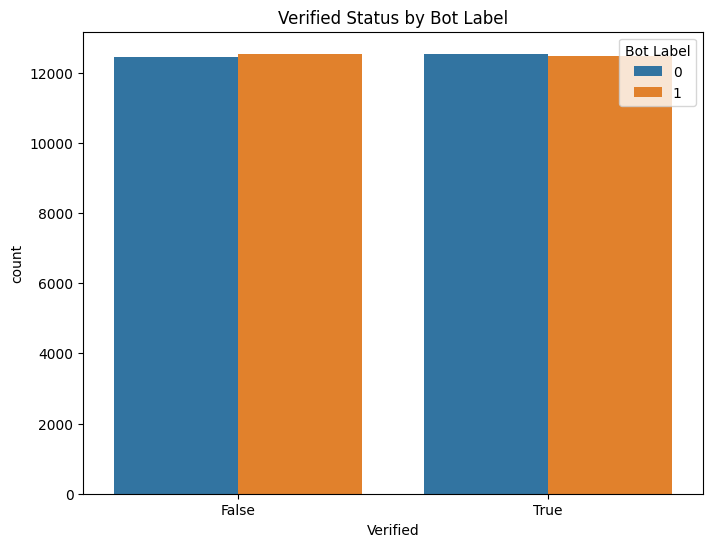

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Verified', hue='Bot Label', data=data)
plt.title('Verified Status by Bot Label')
plt.show()

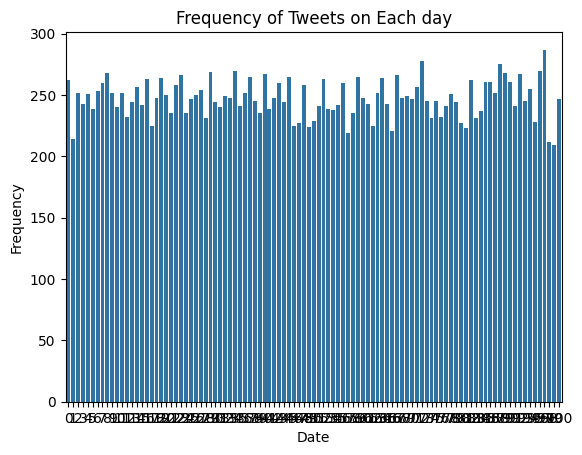

In [41]:
sns.countplot(x='Retweet Count', data=data[data['Bot Label']==0], order=sorted(data['Retweet Count'].unique()))
plt.title('Frequency of Tweets on Each day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

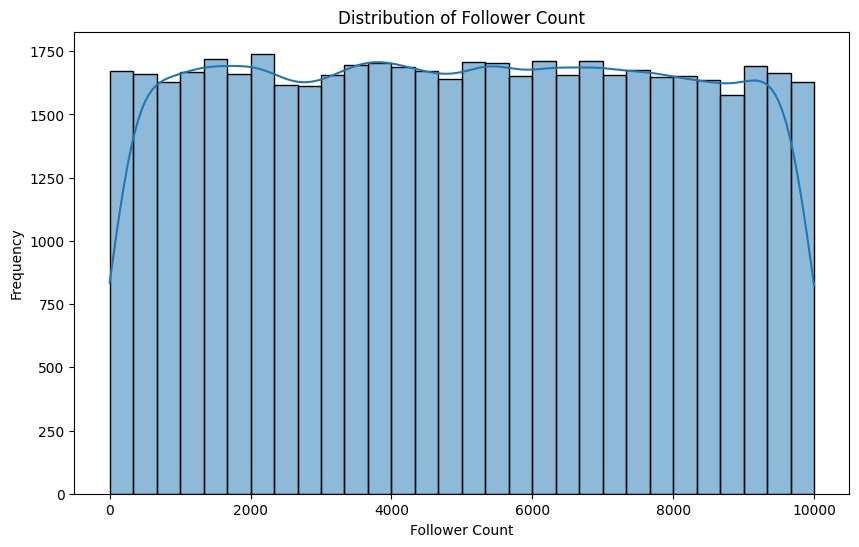

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Follower Count'], kde=True, bins=30)
plt.title('Distribution of Follower Count')
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.show()
